In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
# Python II - Lab 8 - Annie Yen

In [3]:
# read in all_alpha_19.csv file as dataframe
df_part1 = pd.read_csv('all_alpha_19.csv', header='infer')

# query the dataframe
old_df= df_part1.query('Stnd == "T3B125" & (Fuel == "Gasoline"| Fuel=="Diesel")')

# extract columns to be in the new dataframe, mpg must be type float64
cols = ['Model','Displ','Fuel','City MPG','Hwy MPG','Cmb MPG','Greenhouse Gas Score']
new_df = old_df[cols].reset_index(drop=True)
new_df = new_df.astype({'City MPG':np.float64, 'Hwy MPG':np.float64, 'Cmb MPG':np.float64})
def mpg_to_kml(mpg):
    '''
    Convert mpg to kml
    Arg:
        mpg: float
    Return:
        float 
    '''
    return mpg*0.42514
new_df = new_df.assign(CityKML = mpg_to_kml(new_df['City MPG']))
new_df = new_df.assign(HwyKML = mpg_to_kml(new_df['Hwy MPG'])) 
new_df = new_df.assign(CmbKML = mpg_to_kml(new_df['Cmb MPG']))
new_df.to_csv("car_data.csv", header=True, index=True)

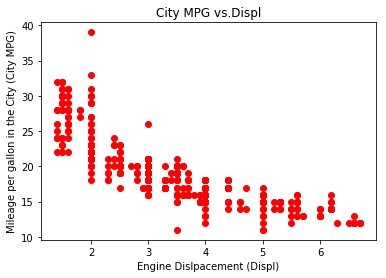

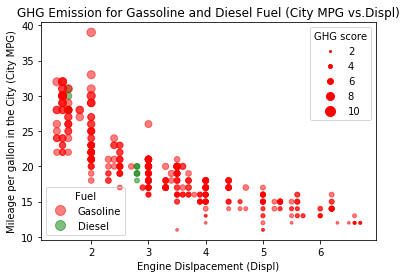

In [5]:
'''City MPG vs. Displ'''
# read in car_data.csv file as dataframe
df_part2 = pd.read_csv('car_data.csv', header='infer', index_col=0)

# convert dtaframe columns to x and y list
x = df_part2['Displ'].tolist()
y = df_part2['City MPG'].tolist()

# plot x and y as scatter plot
plt.scatter(x, y, c='r')
plt.xlabel('Engine Dislpacement (Displ)')
plt.ylabel('Mileage per gallon in the City (City MPG)')
plt.title('City MPG vs.Displ')
plt.show()

'''GHG Emission for Gassoline and Diesel Fuel (City MPG vs.Displ)'''
# create x and y label for gasoline-fuel and diesel-fuel cars
df_gd =df_part2.query('Fuel == "Gasoline"|Fuel == "Diesel"')
df_list = df_gd['Fuel'].tolist()
x = df_gd['Displ'].tolist()
y = df_gd['City MPG'].tolist()

def get_color(fuel):
    '''
    Find the string for color legend
        Args:
            fuel: string
        Returns:
            'r': string
            'g': string
    '''
    if fuel == 'Gasoline':
        return 'r'
    elif fuel == 'Diesel':
        return 'g'

# create color legend for gasoline and diesel fuel cars
c = [get_color(fuel) for fuel in df_list]

# create legend size for gasoline and diesel fuel cars, datatype must be int64
df_gd = df_gd.astype({'Greenhouse Gas Score':np.int64})
s = df_gd.apply(lambda row:8*row['Greenhouse Gas Score'],axis=1).tolist()

# plot scatter plot for gasoline and diesel fuel cars
fig, ax= plt.subplots()
scatter = ax.scatter(x, y, c=c, s=s, alpha=0.5)

colors = ["r", "g"]
texts = ["Gasoline", "Diesel"]
scores = ['2', '4', '6', '8', '10']

patches1 = [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i],
            alpha=0.5, label="{:s}".format(texts[i]))[0]  
           for i in range(len(texts))]
patches2 = [ plt.plot([],[], marker="o", ms=scores[i], ls="", mec=None, color='r', 
            label="{:s}".format(scores[i]))[0]  
           for i in range(len(scores))]
legend1=plt.legend(handles=patches1, loc='lower left', ncol=1, 
           facecolor="None", title='Fuel',numpoints=1)
legend2=plt.legend(handles=patches2, loc='upper right', ncol=1,
           facecolor="None", title='GHG score', numpoints=1)

ax.add_artist(legend1)
plt.xlabel('Engine Dislpacement (Displ)')
plt.ylabel('Mileage per gallon in the City (City MPG)')
plt.title('GHG Emission for Gassoline and Diesel Fuel (City MPG vs.Displ)')

plt.show()

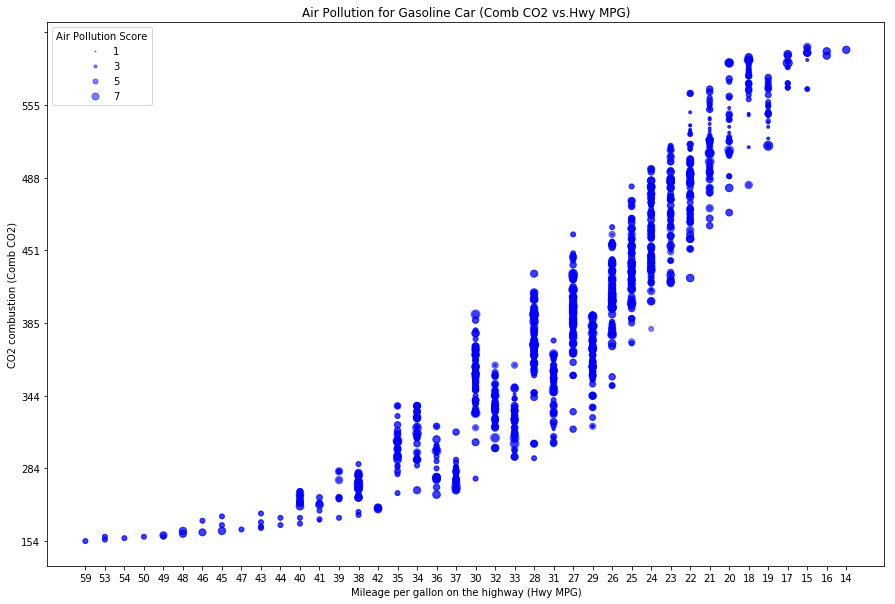

In [9]:
'''Air Pollution for Gasoline Car (Comb CO2 vs.Hwy MPG)'''
# create a new dataframe
cols_extra=['Fuel','City MPG','Air Pollution Score','Cmb MPG','Comb CO2','Hwy MPG','Greenhouse Gas Score']
df_extra = df_part1[cols_extra].reset_index(drop=True)

# create x and y Cmb MPGlabel for gasoline-fuel cars
df_egd =df_extra.query('Fuel == "Gasoline"')
df_egd = df_egd.sort_values(['Cmb MPG'],axis=0, ascending=False)
#df_elist = df_egd['Fuel'].tolist()
x_extra = df_egd['Hwy MPG'].tolist()
y_extra = df_egd['Comb CO2'].tolist()

# create legend size for gasoline cars, datatype must be int64
df_extra = df_extra.astype({'Air Pollution Score':np.int64})
s_extra = df_extra.apply(lambda row:8*row['Air Pollution Score'],axis=1).tolist()

# plot scatter plot for gasoline cars
fig, ax= plt.subplots(figsize=(15,10))
#1 3 5 7
plt.yticks(np.arange(0,500, step=50))
plt.title('Air Pollution for Gasoline Car (Comb CO2 vs.Hwy MPG)')
scatter = ax.scatter(x_extra, y_extra,s=s_extra,c='b', alpha=0.5)
plt.xlabel('Mileage per gallon on the highway (Hwy MPG)')
plt.ylabel('CO2 combustion (Comb CO2)')

scores_extra = ['1', '3', '5', '7']

patches_extra = [ plt.plot([],[], marker="o", ms=scores_extra[i], ls="", mec=None, color='b',
            alpha=0.5, label="{:s}".format(scores_extra[i]))[0]  
           for i in range(len(scores_extra))]
legend_extra = plt.legend(handles=patches_extra, loc='upper left', ncol=1, 
           facecolor="None", title='Air Pollution Score',numpoints=1)

plt.show()